#### Q1- Use the example Notebook used for DICOM images to open and render the images obtained from the lab.  Provide with a link to this notebook in your GitHub.  Provide some screen shotsof the image(s) rendered?

In [1]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom

#it is possible that in some installations pyDICOM won't be available in which case you will have to install it through pip

# Get file
RefDs = dicom.read_file('IM_0319.dcm')
# Let's print all the Metadata here
print(RefDs)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20171115'
(0008, 0013) Instance Creation Time              TM: '112004'
(0008, 0014) Instance Creator UID                UI: 1.3.46.670589.11.34055.5
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.46.670589.11.34055.5.0.4164.2017111511151975364
(0008, 0020) Study Date                          DA: '20171115'
(0008, 0021) Series Date                         DA: '20171115'
(0008, 0022) Acquisition Date                    DA: '20171115'
(0008, 0023) Content Date                        DA: '20171115'
(0008, 0030) Study Time                          TM: '102824'
(0008, 0031) Series Time                         TM: '111406.73000'
(0008, 0032) Acquisition Time                    TM: '111406.73'
(0008, 0

[0, 511, 0, 511]

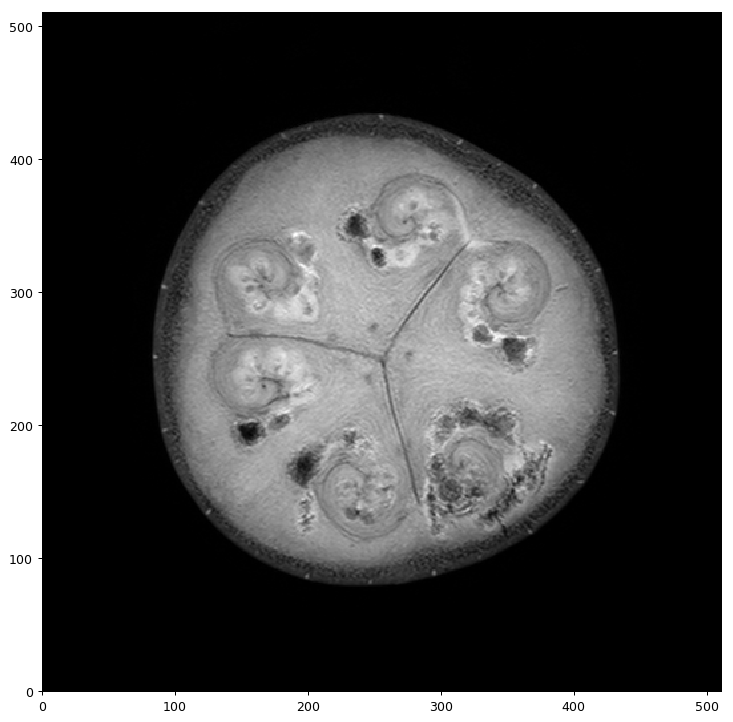

In [13]:
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('IM_0319.dcm')
ArrayDicom[:,:]=ds.pixel_array

#plt.figure()
fig=plt.figure(figsize=(10, 10), dpi= 90, facecolor='w', edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
x=np.arange(RefDs.Rows)
y=np.arange(RefDs.Columns)

plt.pcolormesh(x, y, np.flipud(ArrayDicom[:, :]))
plt.axis([x.min(),x.max(),y.min(),y.max()])

In [9]:
from datetime import datetime

print('The image is '+str(RefDs.Rows)+'x'+str(RefDs.Columns)+' pixels')
print('The image was encoded with '+str(RefDs.BitsStored)+' bits ')
print('The manufacturer is '+str(RefDs.Manufacturer)+' and the model is '+str(RefDs.ManufacturersModelName))
d=datetime.strptime(RefDs.AcquisitionDate,'%Y%m%d')
print('The image was made on '+str(d.date()))
print('The patient\'s name is '+str(RefDs.PatientsName))

The image is 512x512 pixels
The image was encoded with 12 bits 
The manufacturer is Philips Medical Systems and the model is Achieva
The image was made on 2017-11-15
The patient's name is res_watermelon


#### Q2. From the Metadata in the DICOM describe the type of MR sequence and the sequence param-eters that were used to acquire the image(s).  You should describe at minimum 5 parameters.and briefly explain what those parameters refer to using your MRI lecture concepts.

##### Echo Time:

Time in ms between the middle of the excitation pulse and the peak of the echo produced (kx=0). In the case of segmented k-space, the TE (eff) is the time between the middle of the excitation pulse to the peak of the echo that is used to cover the center of k-space (i.e.-kx=0, ky=0)[1]

##### Echo Train Length:

Number of lines in k-space acquired per excitation per image.[1]

##### Steady State Sequence:

Is a sort of gradient echo MRI pulse grouping in which a consistent, remaining transverse magnetisation (Mxy) is kept up between progressive cycles? The sequence is noted for its prevalence in unique/cine evaluation of cardiovascular capacity.[2] 

##### Multiple Spin Echo:

Multiple Spin Echo category of pulse sequence used to collect different lines in k-space for a single frame. Enumerated Values: YES NO required if Image Type (0018, 9011) Value 1 is ORIGINAL or MIXED and Echo Pulse sequence (0018, 9011) equals SPIN or BOTH. Otherwise may be present if Image Type (0018, 9011) Value 1 is DERIVED and Echo Pulse sequence (0018, 9008) equals SPIN or BOTH.[1]

##### Echo Planar Pulse Sequence:

Echo Planar category of Pulse Sequences. Enumerated Values: YES NO required if Image Type (0018, 9017) Value 1 is ORIGINAL or MIXED. May be present otherwise.[1]


#### Q3. What is the di erence between the Acquisition Matrix that you can and in your Metadata and the number of pixels that your image has?  Investigate why is there a difference and briefly explain.

The acquisition matrix (0018, 1310) show the Dimensions of the acquired frequency /phase data before reconstruction. Multi-valued: frequency rows\frequency columns\phase rows\phase columns. Where as the pixels are the smallest unit of information that makes up a picture. Usually round or square, they are typically arranged in a 2-dimensional grid. The difference between our acquisition matrix in the metadata and in our image is the dimension. 

#### Q4.  What is the frequency that is listed in the Metadata referring to?  Would you expect this value to change with different scanners?  What would make this value change?  Explain briefly.

The imaging frequency is 127.753952MHz. Firstly the scanner which we use in our lab having the magnetic field of 3 tesla, therefore the maximum imaging frequency must be equal or under 128MHz. Secondly, yes we can change the frequency by using the scanner with high magnetic field. Because if the magnetic field is high then it can produce maximum number of RF coils which will improve the frequency.

#### Q5.  Briefly discuss any observations and issues during acquisition.

In this entirety transform of image acquisition we watched that no metallic things permitted of the MRI space Also watch exactly movement artifacts about test in this lab our less group assembled all example similar to water melon Furthermore egg thus in this entire transform we watched picture with diverse slices What's more analyze which you quit offering on that one will be those best with the goal. I took the best particular case picture that is IM-0319 this picture provides for us every one data it’s significant will throughout securing on extricate a finer come about Also then afterward that we connected more cutting strategies and the primary issue in this entire transform those movement relic for sample.



#### References:

1- (n.d.). Retrieved Decemember 04, 2017, from http://dicomlookup.com/dicom-table.asp

2- Weerakkody, Y. (n.d.). Steady-state free precession MRI | Radiology Reference Article. Retrieved December 04, 2017, from https://radiopaedia.org/articles/steady-state-free-precession-mri-2